In [ ]:
#for calibration

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
ncl1 = 'Cs137'   #edit here!!!!!!
ncl1_mean_eng = 662   #edit here!!!!!!

In [19]:
ncl2 = 'Co60'   #edit here!!!!!!
ncl2_mean_eng = 1173   #edit here!!!!!!

In [20]:
num_ncls = 2

In [21]:
################################################

In [22]:
# input th data for caribration
direction = 'down'   #edit here!!!!!!
date = '01261116'   #edit here!!!!!!
nucleon = 'Co60'   #edit here!!!!!!
mean_eng = 1173   #edit here!!!!!!
carib_path = '/Users/r.shinoda/p1/data/caribration'

path = os.path.join(carib_path, direction, nucleon + '_' + date + direction + '0.txt')
print(path)

/Users/r.shinoda/p1/data/caribration/down/Co60_01261116down0.txt


In [7]:
with open(path) as f:
    lines = f.readlines()
    num = len(lines)/1023
    print(num)

19563.0


In [8]:
# plt.plot([int(line) for line in lines[:1023]])
# plt.xlim([500, 570]) #ADC trigger is at 512

In [9]:
# test = np.array([int(line) for line in lines[:1023]])
# test.mean()

In [10]:
# plt.plot(test - test[0:500].mean())
# subtracted = test - test[0:500].mean()
# subtracted[500:600].sum()
# plt.xlim([500, 570])

In [11]:
N_points = 1023
data = np.array([int(line) for line in lines])
length = len(data)//N_points
data_res = data[:length * N_points].reshape(-1,N_points)

def intg(d):
    return (d[510:525] - d[:500].mean()).sum()

array = [-intg(d) for d in data_res]
hist, edges = np.histogram(array, bins=1000, range=(0,1000))
del data
del data_res

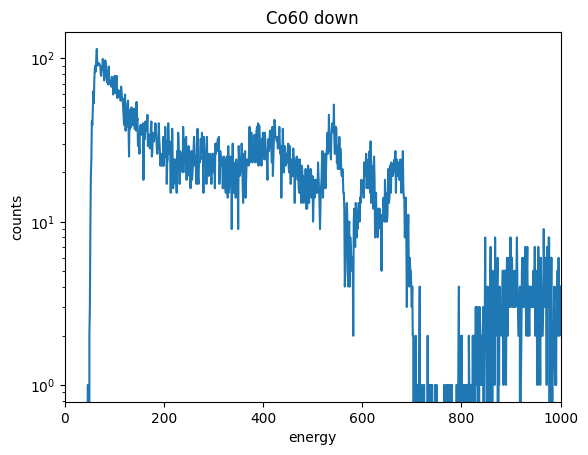

In [31]:
plt.plot(edges[:-1], hist)
plt.xlim([0, 1000])
plt.xlabel('energy')
plt.ylabel('counts')
plt.yscale('log')
plt.title(nucleon + ' ' + direction)
save_path = carib_path + '/' + direction + '/' + nucleon + '_' + direction
plt.savefig(save_path)
np.save(save_path + 'hist', hist)

Text(0.5, 1.0, 'Co60 down')

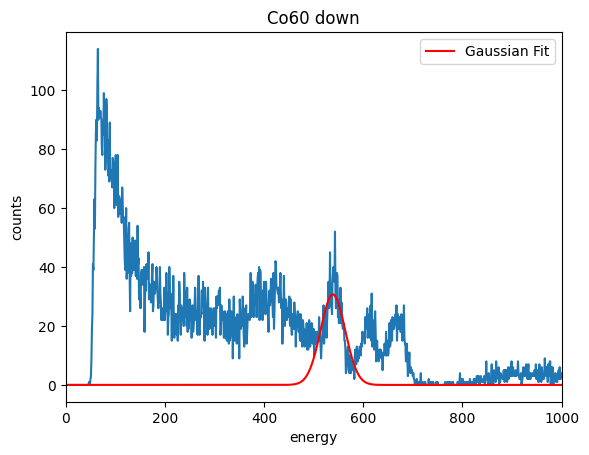

In [32]:
from scipy.optimize import curve_fit

plt.plot(edges[:-1], hist)
bin_centers = 0.5 * (edges[:-1] + edges[1:])

fit_range_mask = (bin_centers >= 500) & (bin_centers <= 600)   #edit here!!!!!!
fit_range_bin_centers = bin_centers[fit_range_mask]
fit_range_hist_data = hist[fit_range_mask]

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev)**2 / 2)

initial_params = [40, 550, 10]   #edit here!!!!!! [amplitude, center, stddev]

params, covariance = curve_fit(gaussian, fit_range_bin_centers, fit_range_hist_data, p0=initial_params)
amplitude, mean, stddev = params

plt.plot(bin_centers, gaussian(bin_centers, amplitude, mean, stddev), 'r-', label='Gaussian Fit')
plt.xlim([0, 1000])
plt.xlabel('energy')
plt.ylabel('counts')
plt.legend()
plt.title(nucleon + ' ' + direction)

In [33]:
print(params)
#amplitude mean stddev

[ 30.69566834 538.76749383  24.71504169]


In [34]:
params_path = os.path.join(carib_path, direction, nucleon + '_' + str(mean_eng) + 'keV_' + direction + '_params.npy')
print(params_path)
np.save(params_path, params)

/Users/r.shinoda/p1/data/caribration/down/Co60_1173keV_down_params.npy


In [35]:
####################################

In [36]:
ncl1_params_path = os.path.join(carib_path, direction, ncl1 + '_' + str(ncl1_mean_eng) + 'keV_' + direction + '_params.npy')
print(ncl1_params_path)
ncl1_mean = np.load(ncl1_params_path)[1] #0, 1, 2, ...
print(ncl1_mean)

/Users/r.shinoda/p1/data/caribration/down/Cs137_662keV_down_params.npy
311.2702352459763


In [37]:
ncl2_params_path = os.path.join(carib_path, direction, ncl2 + '_' + str(ncl2_mean_eng) + 'keV_' + direction + '_params.npy')
print(ncl2_params_path)
ncl2_mean = np.load(ncl2_params_path)[1] #0, 1, 2, ...
print(ncl2_mean)

/Users/r.shinoda/p1/data/caribration/down/Co60_1173keV_down_params.npy
538.767493829453


In [38]:
# for loop in range(num_ncls):
#     def ncl_params_path(loop):
#         return (os.path.join(carib_path, direction, ncl + str(loop) + '_' + str(ncl1_mean_eng) + 'keV_' + direction + '_params.npy'))

#     def ncl_mean(loop):
#         return np.load(ncl1_params_path)[1] #0, 1, 2, ...
    
#     print(ncl_mean)

y = 2.17x + -4.38


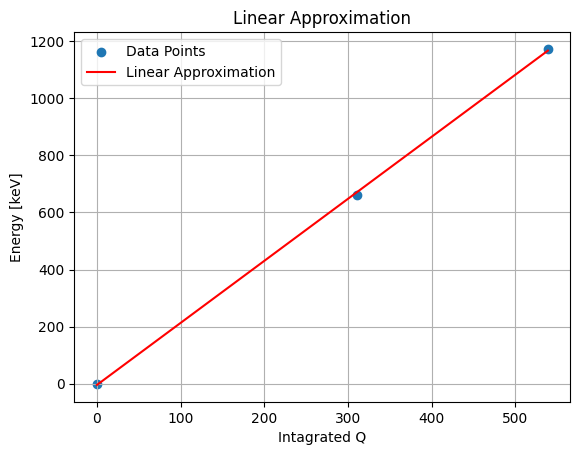

In [39]:
def linapp(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]

    return m, c

#y = [511, 662, 1275]    # Energy [keV]

xarray = [0, ncl1_mean, ncl2_mean]    # ADC channel
yarray = [0, ncl1_mean_eng, ncl2_mean_eng]   # Energy [keV]

slope, intercept = linapp(xarray, yarray)
print(f"y = {slope:.2f}x + {intercept:.2f}") #傾きが1ADCカウントが何keVに対応するか

plt.scatter(xarray, yarray, label='Data Points')
plt.plot(xarray, [slope * x + intercept for x in xarray], 'r', label='Linear Approximation')
plt.xlabel('Intagrated Q')
plt.ylabel('Energy [keV]')
plt.title('Linear Approximation')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
linapp_path = os.path.join(carib_path, direction, direction + '_linapp_params.npy')
print(linapp_path)

/Users/r.shinoda/p1/data/caribration/down/down_linapp_params.npy


In [41]:
np.save(linapp_path, [slope, intercept])

In [ ]:
##############################################################

In [ ]:
#open background data
with open('/Users/r.shinoda/Desktop/down01231551_BG/01231551down0.txt') as g:
    glines = g.readlines()
    gnum = len(glines)/1023
    print(gnum)

In [ ]:
gtest = np.array([int(line) for line in glines[:1023]])
gtest.mean()
plt.plot(gtest - gtest[0:500].mean())
gsubtracted = gtest - gtest[0:500].mean()
gsubtracted[500:600].sum()
plt.xlim([500, 570])

In [ ]:
N_points = 1023
gdata = np.array([int(line) for line in glines]) #lineを取り出してきて整数にしてnumpyのarrayに入れる
glength = len(gdata)//N_points #1023で割って波形の個数を数える//は整数割り算の商の意味
gdata_res = gdata[:glength * N_points].reshape(-1,N_points) #全データを取ってきて二次元配列にする

def intg(d):
    return (d[510:525] - d[:500].mean()).sum() #intg関数の定義 平均を差し引いて離散和をとる

garray = [-intg(d) for d in gdata_res]
ghist, gedges = np.histogram(garray, bins=3000)
plt.plot(gedges[:-1], ghist)
plt.xlim([0, 1000])
plt.xlabel('ADC channel')
plt.ylabel('ADC counts')

In [ ]:
hist_diff = fhist - ghist
plt.plot(fedges[:-1], hist_diff)
plt.xlim([0, 1000])
plt.xlabel('ADC channel')
plt.ylabel('ADC counts')

In [ ]:
print(gdata_res)

In [ ]:
ehist = np.subtract(fhist, fhist)